In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
# inspect datasets
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [7]:
#check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
#merge datasets for combined analysis
data = pd.merge(transactions, customers, on="CustomerID")
data = pd.merge(data, products, on="ProductID")

In [11]:
# top regions by customer count
customer_region = customers['Region'].value_counts()
print(customer_region)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


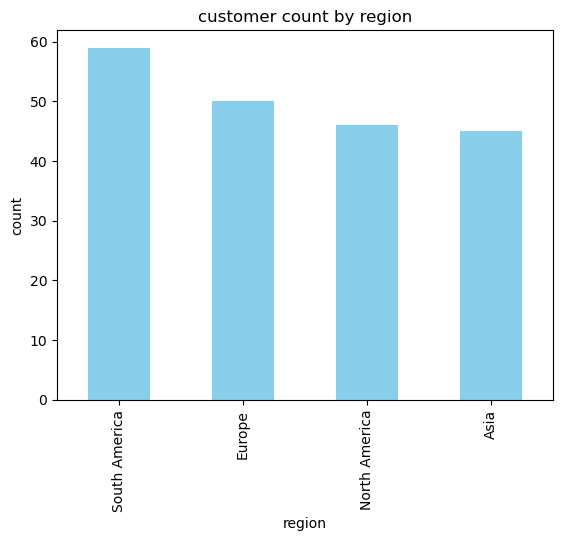

In [13]:
#visualize regions
customer_region.plot(kind='bar', color='skyblue')
plt.title('customer count by region')
plt.xlabel('region')
plt.ylabel('count')
plt.show()

In [15]:
# analyze sales trends
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['YearMonth'] = data['TransactionDate'].dt.to_period('M')
sales_trends = data.groupby('YearMonth')['TotalValue'].sum()
print(sales_trends)

YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


In [17]:
# top products by revenue
top_products = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

In [19]:
print(top_products)

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


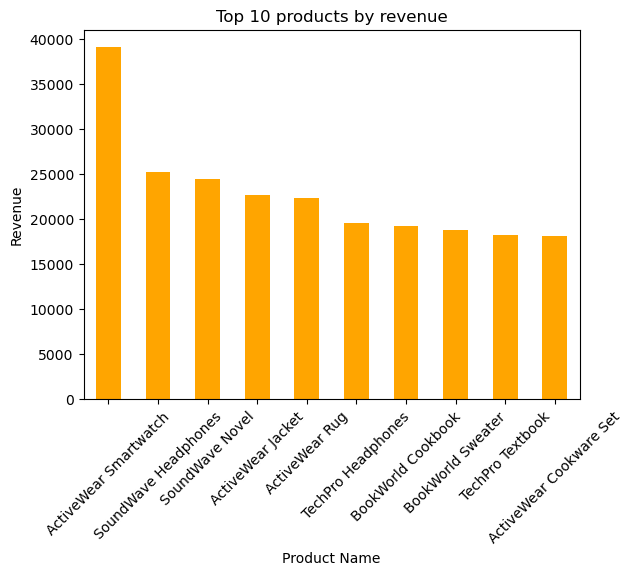

In [21]:
#plot top products
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 products by revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()